In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import pandas as pd

In [15]:
# Define transformations to apply to the data
transform = transforms.ToTensor()

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

In [16]:
torch.manual_seed(4)
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

In [17]:
class ShonkhaModel(nn.Module):
  def __init__(self, input, hidden_layer1, hidden_layer2, output):
        super(ShonkhaModel, self).__init__()
        self.fc1 = nn.Linear(input, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, output)

  def forward(self, x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = F.relu(self.out(x))
      return x

In [18]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd
from IPython.display import display

shonkhaObject = ShonkhaModel(784, 784//4, 784//8, 10).to(torch.device('cuda'))

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(shonkhaObject.parameters(), lr=0.01, momentum=0.9)

losses = []
accuracies = []
precisions_micro = []
recalls_micro = []
f1_scores_micro = []
precisions_macro = []
recalls_macro = []
f1_scores_macro = []
precisions_weighted = []
recalls_weighted = []
f1_scores_weighted = []

for i in range(20):
  curr_loss = 0.0
  y_true = []
  y_pred = []

  for j, data in enumerate(train_loader):
    input, output = data[0].to(torch.device('cuda')), data[1].to(torch.device('cuda'))
    input = input.reshape(50, -1)

    optimizer.zero_grad()

    pred_out = shonkhaObject.forward(input)
    loss = criterion(pred_out, output)

    loss.backward()
    optimizer.step()

    curr_loss += loss.item()
    y_true += output.tolist()
    y_pred += torch.argmax(pred_out, dim=1).tolist()

  loss_avg = curr_loss / len(train_loader)
  losses.append(loss_avg)

  acc = accuracy_score(y_true, y_pred)
  accuracies.append(acc*100)

  precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(y_true, y_pred, average='micro', zero_division=1)
  precisions_micro.append(precision_micro)
  recalls_micro.append(recall_micro)
  f1_scores_micro.append(f1_micro)

  precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_true, y_pred, average='macro', zero_division=1)
  precisions_macro.append(precision_macro)
  recalls_macro.append(recall_macro)
  f1_scores_macro.append(f1_macro)

  precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted', zero_division=1)
  precisions_weighted.append(precision_weighted)
  recalls_weighted.append(recall_weighted)
  f1_scores_weighted.append(f1_weighted)
  print(f'epoch: {i:2}  loss: {loss_avg}')



perf_metrics = {
    'loss': losses,
    'accuracy': accuracies,
    'precision_micro': precisions_micro,
    'recall_micro': recalls_micro,
    'f1_micro': f1_scores_micro,
    'precision_macro': precisions_macro,
    'recall_macro': recalls_macro,
    'f1_macro': f1_scores_macro,
    'precision_weighted': precisions_weighted,
    'recall_weighted': recalls_weighted,
    'f1_weighted': f1_scores_weighted
}

perf_metrics_df = pd.DataFrame(perf_metrics)
display(perf_metrics_df)




epoch:  0  loss: 1.285494633143147
epoch:  1  loss: 0.6555030452335874
epoch:  2  loss: 0.5721351130555073
epoch:  3  loss: 0.5361546994621555
epoch:  4  loss: 0.5167127748796095
epoch:  5  loss: 0.500686313615491
epoch:  6  loss: 0.4903376740217209
epoch:  7  loss: 0.48155469975123805
epoch:  8  loss: 0.4745434199521939
epoch:  9  loss: 0.4690133916027844
epoch: 10  loss: 0.4639581961246828
epoch: 11  loss: 0.46032170954781276
epoch: 12  loss: 0.458133472862343
epoch: 13  loss: 0.4546679196693003
epoch: 14  loss: 0.452056824558725
epoch: 15  loss: 0.4506651158320407
epoch: 16  loss: 0.4484983075596392
epoch: 17  loss: 0.4469686820233862
epoch: 18  loss: 0.44601224455361566
epoch: 19  loss: 0.4446936366086205


,loss,accuracy,precision_micro,recall_micro,f1_micro,precision_macro,recall_macro,f1_macro,precision_weighted,recall_weighted,f1_weighted
0,1.285495,54.275000,0.542750,0.542750,0.542750,0.563784,0.530240,0.452365,0.571937,0.542750,0.463339
1,0.655503,76.871667,0.768717,0.768717,0.768717,0.841839,0.758470,0.688589,0.842384,0.768717,0.699379
2,0.572135,78.433333,0.784333,0.784333,0.784333,0.872950,0.774043,0.710575,0.873520,0.784333,0.721413
3,0.536155,79.088333,0.790883,0.790883,0.790883,0.888477,0.780604,0.720799,0.889020,0.790883,0.731632
4,0.516713,79.466667,0.794667,0.794667,0.794667,0.897383,0.784359,0.726659,0.897975,0.794667,0.737539
5,0.500686,79.813333,0.798133,0.798133,0.798133,0.904337,0.787792,0.731547,0.904934,0.798133,0.742450
6,0.490338,79.926667,0.799267,0.799267,0.799267,0.908776,0.788924,0.734038,0.909424,0.799267,0.744973
7,0.481555,80.153333,0.801533,0.801533,0.801533,0.912309,0.791148,0.736812,0.912971,0.801533,0.747776
8,0.474543,80.323333,0.803233,0.803233,0.803233,0.916142,0.792849,0.739369,0.916841,0.803233,0.750354
9,0.469013,80.341667,0.803417,0.803417,0.803417,0.918469,0.793028,0.740441,0.919162,0.803417,0.751428


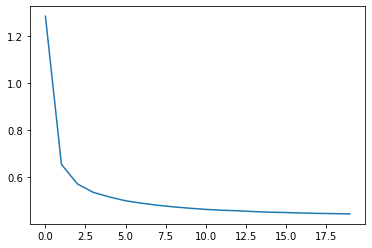

In [19]:
plt.plot(range(20), losses)

In [20]:
correct = 0
total = 0

target_out = []
pred_out = []
with torch.no_grad():
    for (i, data) in enumerate(test_loader):
        input, output = data[0].to(torch.device('cuda')), data[1].to(torch.device('cuda'))
        # Predict the class of the image
        input = input.reshape(100, -1)
        outputs = shonkhaObject.forward(input)
        _, predicted = torch.max(outputs.data, 1)

        pred_out += predicted.tolist()
        target_out += output.tolist()


loss_avg = curr_loss / len(train_loader)

acc = accuracy_score(y_true, y_pred)

precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(y_true, y_pred, average='micro', zero_division=1)


precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_true, y_pred, average='macro', zero_division=1)


precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted', zero_division=1)


perf_metrics = {
    'loss': [loss_avg],
    'accuracy': [acc*100],
    'precision_micro': [precision_micro*100],
    'recall_micro': [recall_micro*100],
    'f1_micro': [f1_micro*100],
    'precision_macro': [precision_macro*100],
    'recall_macro': [recall_macro*100],
    'f1_macro': [f1_macro*100],
    'precision_weighted': [precision_weighted*100],
    'recall_weighted': [recall_weighted*100],
    'f1_weighted': [f1_weighted*100]
}

perf_metrics_df = pd.DataFrame(perf_metrics)
display(perf_metrics_df)


,loss,accuracy,precision_micro,recall_micro,f1_micro,precision_macro,recall_macro,f1_macro,precision_weighted,recall_weighted,f1_weighted
0,0.444694,80.81,80.81,80.81,80.81,93.02522,79.763723,74.799629,93.105847,80.81,75.908548
